**IMPORT LIBRARIES**

In [1]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import os
import IPython.display as ipd
%matplotlib inline
from warnings import simplefilter
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)
simplefilter(action='ignore', category=FutureWarning)

C:\Users\sarib\AppData\Roaming\Python\Python38\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sarib\AppData\Roaming\Python\Python38\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\sarib\AppData\Roaming\Python\Python38\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [118]:
root_path="UrbanSound8K/audio/"
image_path="UrbanSound8K/image/"

**CREATE SPECTRGOGRAM**

In [117]:
def get_spectrogram(file):
    signal, sample_rate = librosa.load(file)
    spec_conv = librosa.amplitude_to_db(librosa.feature.melspectrogram(signal),ref=np.max)
    return spec_conv

In [107]:
#SİLİNECEK
deneme=get_spectrogram("UrbanSound8K/audio/fold1/7061-6-0-0.wav")

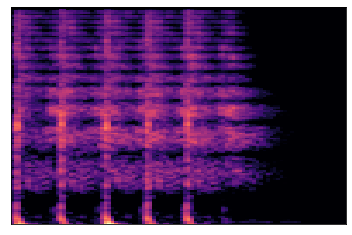

In [112]:
#SİLİNECEK
librosa.display.specshow(deneme)
plt.savefig("UrbanSound8K\image/a.png")

**SAVE SPECTROGRAM IMAGES**

In [121]:
for root, directories, files in os.walk(root_path):
    for file_name in files:
        if root is not root_path and file_name.endswith('.wav'):
           data = get_spectrogram(os.path.join(root,file_name))
           #print(os.path.basename(os.path.normpath(root)))
           librosa.display.specshow(data)
           file_path=os.path.join(image_path,os.path.basename(os.path.normpath(root)),os.path.splitext(file_name)[0])
           plt.savefig(file_path)

In [56]:
#CANCELLED
"""extracted_features =[]
for root, directories, files in os.walk(root_path):
    for file_name in files:
        if root is not root_path and file_name.endswith('.wav'):
           data = get_spectrogram(os.path.join(root,file_name))
           isplitted = file_name.split("-")
           extracted_features.append([data,isplitted[1]])"""

In [57]:
#CANCELLED
"""extracted_feataures_dataframe= pd.DataFrame(extracted_features, columns=["spectrogram", "class"])
extracted_feataures_dataframe.head()"""

,spectrogram,class
0,"[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8...",3
1,"[[-80.00001, -80.00001, -80.00001, -80.00001, ...",3
2,"[[-72.73588, -80.0, -80.0, -80.0, -80.0, -80.0...",3
3,"[[-75.427284, -75.114, -70.847015, -73.61035, ...",3
4,"[[-8.261272, -1.6765099, -0.09167099, -1.29726...",6


In [58]:
#CANCELLED
"""extracted_feataures_dataframe.info()"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   spectrogram  8732 non-null   object
 1   class        8732 non-null   object
dtypes: object(2)
memory usage: 136.6+ KB


In [78]:
#CANCELLED
"""extracted_feataures_dataframe['class'].value_counts()"""

3    1000
7    1000
5    1000
2    1000
9    1000
0    1000
4    1000
8     929
1     429
6     374
Name: class, dtype: int64